# Desafio

## 1. Tratativa dos dados

Nessa seção foi carregado o conteúdo do arquivo [googleplaystore.csv](./googleplaystore.csv) dentro da variável data. Em seguida foi feita a remoção de linhas duplicadas a partir da coluna App.
 
#### Tratamentos:

    1. Na coluna installs os caracteres não numéricos foram removidos e campos vazios foram substituídos por 0, logo após foi feita a conversão da coluna para int.

    2. Foi removida a linha que apresentava o dado 1.9 na coluna category, pois esta estava faltando dados, levando ao preenchimento dos campos na ordem errada.

    3. Foi feita a conversão da coluna Reviews para int para fins de cálculo.

    4. Foram substituídos os valores de NaN na coluna Rating para 0 e em seguida a coluna foi convertida para float.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv('googleplaystore.csv')
data = data.drop_duplicates(subset='App')
data = data.drop(data[data['Category'] == '1.9'].index)


data['Installs'] = data['Installs'].str.replace(r'\D', '', regex=True)
data['Installs'] = data['Installs'].replace('', '0')
data['Installs'] = data['Installs'].astype(int)

data['Reviews'] = data['Reviews'].astype(int)

data['Rating'] = data['Rating'].replace('NaN', '0')
data['Rating'] = data['Rating'].astype(float)

## 2. 5 apps com maior número de instalação

A partir da função **nlargtest** foram obtidas as 5 linhas com maior valor da coluna installs, contudo muitos apps tem valores de instalação igual, então a função trouxe os 5 primeiros maiores que encontrou.

Em seguida foi realizada a criação do gráfico, no estilo Installs X Apps, aplicando uma rotação de 45° aos nomes dos aplicativos e definindo  que o valor do eixo y se dá em função do valor de Installs. Por fim foi criado do gráfico.

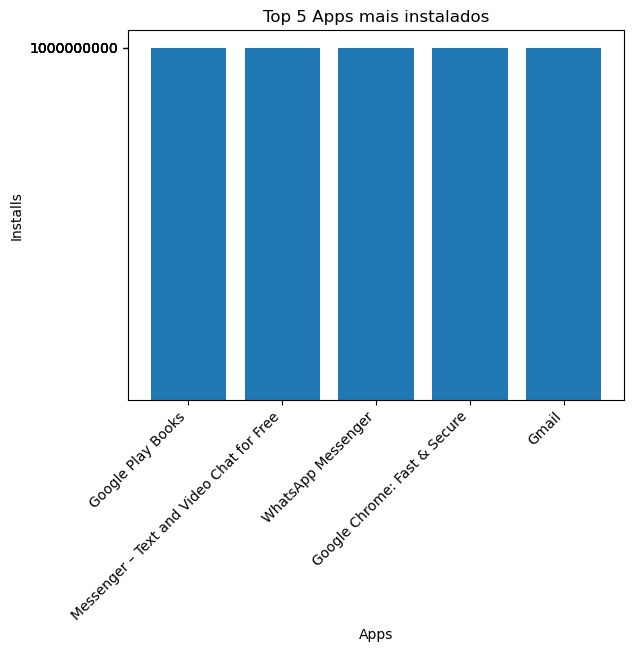

In [2]:
top_5_apps = data.nlargest(5, 'Installs')


plt.bar(top_5_apps['App'], top_5_apps['Installs'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Apps')
plt.ylabel('Installs')
plt.yticks(top_5_apps['Installs'], top_5_apps['Installs'])
plt.title('Top 5 Apps mais instalados')
plt.show()

## 3. Categorias dos apps

A coluna categoria é agrupada e armazenada dentro da variável categorias com seu tamanho, em seguida seu valor é convertido para um dicionário. Assim temos as categorias, que são as chaves e quantidade que são os valores, logo passamos os dados para o gráfico de pizza para que a figura possa ser construída.

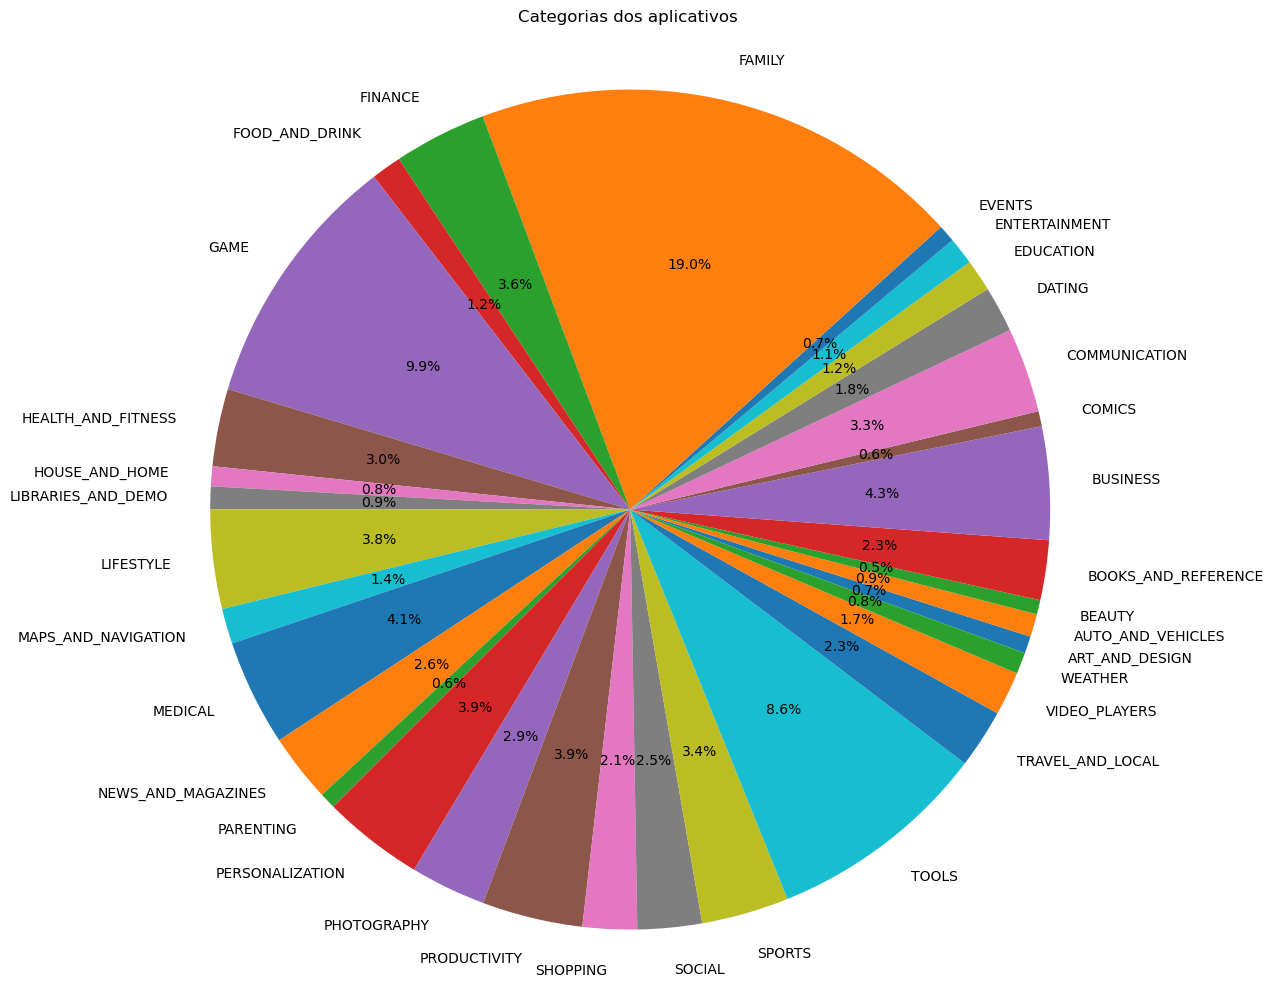

In [3]:
categorias = data.groupby('Category').size()
categorias = categorias.to_dict()

conjunto_categoria = categorias.keys()
conjunto_quantidades = categorias.values()


plt.figure(figsize=(16, 12))
plt.pie(conjunto_quantidades, labels=conjunto_categoria, autopct='%1.1f%%', startangle=340)
plt.title('Categorias dos aplicativos \n')
plt.axis('equal')
plt.show()


## 4. App mais caro

Foi feita a interação pelas linhas do data frame e armazenado o valor que fosse maior do que a variável app_mais_caro, a qual era atualizada pelo mais alto a cada iteração, de modo que ao final fosse exibida a linha com preço mais alto.

In [4]:
mais_caro = 0
app_mais_caro = ''
for indice, linha in data.iterrows():
    valor = float(linha['Price'].replace('$', ''))
    if valor > mais_caro:
        mais_caro = valor
        app_mais_caro = linha

print(f"App: {app_mais_caro['App']} | Price: {app_mais_caro['Price']}")

App: I'm Rich - Trump Edition | Price: $400.00


## 5. Aplicativos para 17+

Foi feita a contagem de quantas vezes o elemento ***Mature  17+*** aparecia na coluna ***Content Rating***, em seguida foi exibido o resultado.

In [5]:
contagem = data['Content Rating'].value_counts()['Mature 17+']
print(f'Apps Mature 17+: {contagem}')

Apps Mature 17+: 393


## 6. 10 Aplicativos com mais reviews

Através da função **nlargest** foi verificado os 10 maiores valores da coluna Reviews, em seguida foi feita uma interação pelo data frame gerado e exibido os dados solicitados. Logo após, foi criado o gráfico de linhas no formato App X Reviews.

App: Facebook | Reviews: 78158306
App: WhatsApp Messenger | Reviews: 69119316
App: Instagram | Reviews: 66577313
App: Messenger – Text and Video Chat for Free | Reviews: 56642847
App: Clash of Clans | Reviews: 44891723
App: Clean Master- Space Cleaner & Antivirus | Reviews: 42916526
App: Subway Surfers | Reviews: 27722264
App: YouTube | Reviews: 25655305
App: Security Master - Antivirus, VPN, AppLock, Booster | Reviews: 24900999
App: Clash Royale | Reviews: 23133508


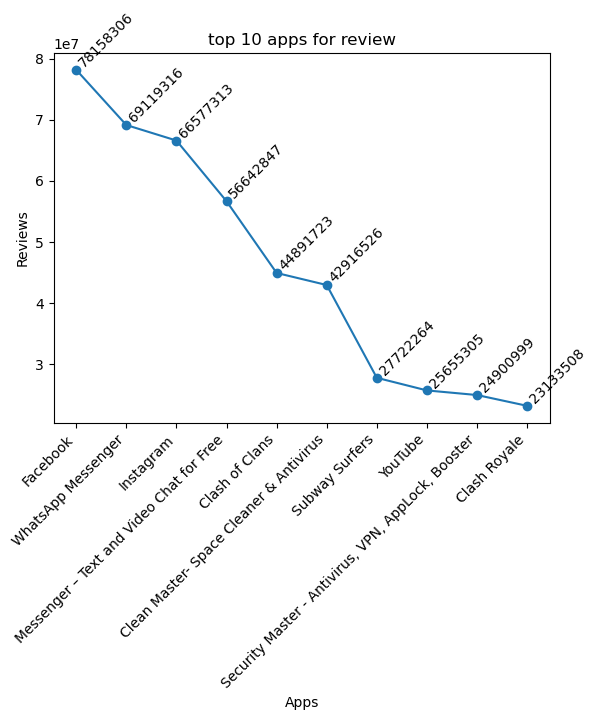

In [6]:
top_10_apps = data.nlargest(10, 'Reviews')
for _, app in top_10_apps.iterrows():
    print(f"App: {app['App']} | Reviews: {app['Reviews']}")


plt.plot(top_10_apps['App'], top_10_apps['Reviews'], marker='o', linestyle='-')

plt.xlabel('Apps')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Reviews')

for i, reviews in enumerate(top_10_apps['Reviews']):
    plt.text(i, reviews, str(reviews), ha='left', va='bottom', rotation=45)

plt.title('top 10 apps for review')

plt.show()

## 7. Quantidade de apps gratuitos

Foi verificado a quantidade de elementos da coluna **Price** que possuíam valor igual a zero, em seguida exibido seu resultado.

In [7]:
contagem = data['Price'].value_counts()['0']
print(f'Quantidade de Apps gratuitos: {contagem}')


Quantidade de Apps gratuitos: 8903


## 8. Apps com as maiores avaliações dentre os 10 com mais reviews

Foi utilizada a função **nlargest** dentro do data frame **top_10_apps** (que são os apps com mais avaliações) para pegar dentre eles os que tinham as maiores classificações. Em seguida foi criado um gráfico de dispersão contendo o esquema Apps X Rating.

App: Clean Master- Space Cleaner & Antivirus | Rating: 4.7
App: Security Master - Antivirus, VPN, AppLock, Booster | Rating: 4.7
App: Clash of Clans | Rating: 4.6
App: Clash Royale | Rating: 4.6
App: Instagram | Rating: 4.5


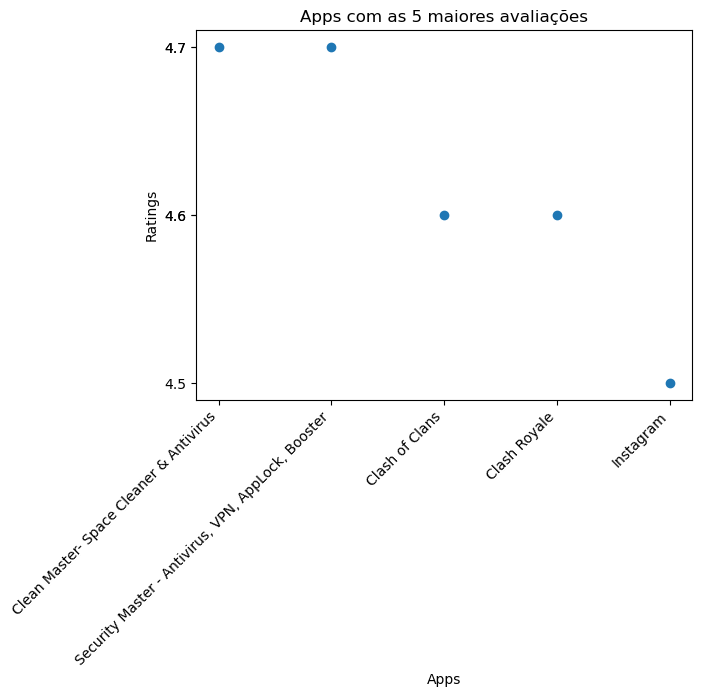

In [8]:

top_5_apps = top_10_apps.nlargest(5, 'Rating')
for _, app in top_5_apps.iterrows():
    print(f"App: {app['App']} | Rating: {app['Rating']}")


plt.scatter(top_5_apps['App'], top_5_apps['Rating'] )
plt.yticks(top_5_apps['Rating'])

plt.xlabel('Apps')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Ratings')
plt.title('Apps com as 5 maiores avaliações')

plt.show()